# 二、Python作图工具

In [1]:
import matplotlib.pyplot as plt #pyplot在某些环境下不能通过import matplotlib来调用

(array([5., 2., 1., 1., 2., 3.]),
 array([1, 2, 3, 4, 5, 6, 7]),
 <a list of 6 Patch objects>)

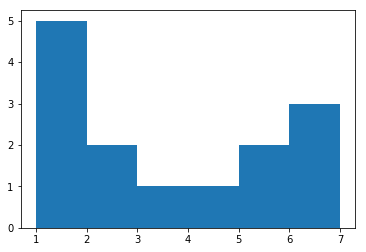

In [2]:
sample=[1,1,2,3,1,1,4,5,6,6,6,5,2,1]
plt.hist(sample,bins =list(range(1,8))) #注意bin参数的选择

(array([5., 0., 2., 0., 1., 0., 1., 0., 2., 3.]),
 array([1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. , 5.5, 6. ]),
 <a list of 10 Patch objects>)

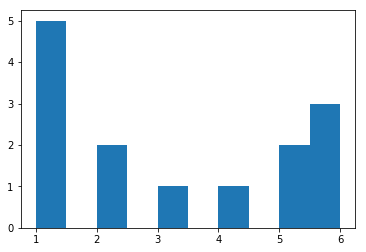

In [4]:
plt.hist(sample) #使用默认参数无法达到理想效果

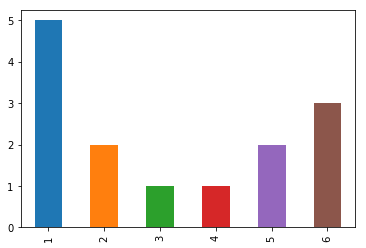

In [25]:
import pandas as pd
sample1 =pd.DataFrame(sample)
sample1 = sample1.rename(columns = {0: "Count"}) #改变列标签
sample1['Count'].value_counts(sort=False).plot.bar() #dataframe有多种图可以选择，此处为了比较选择bar()

# 三、数据分析

## 1. JSON 类型数据（JavaScript Object Notation）

In [3]:
import json

In [4]:
with open('logins.json') as json_file:
     data1 = json.load(json_file)

In [5]:
data1[0:5]

['2012-03-01T00:05:55+00:00',
 '2012-03-01T00:06:23+00:00',
 '2012-03-01T00:06:52+00:00',
 '2012-03-01T00:11:23+00:00',
 '2012-03-01T00:12:47+00:00']

In [21]:
data1[-1]

'2012-04-30T23:59:29+00:00'

## 2.   时间序列的处理

In [6]:
import datetime
from dateutil import tz
from_zone = tz.tzutc() #获取UTC的时区
to_zone = tz.gettz('America/New_York') #获取美国东部时区
local_date =[0 for y in range(len(data1))]
for i in range(len(local_date)):
    dt = datetime.datetime.strptime(data1[i],"%Y-%m-%dT%H:%M:%S+00:00") #注意格式
    utc = dt.replace(tzinfo=from_zone)
    local = utc.astimezone(to_zone)
    local = datetime.datetime(local.year, local.month, local.day, local.hour, local.minute, local.second)
    local_date[i] = datetime.datetime.strftime(local, "%Y-%m-%d %H:%M:%S")#datetime.datetime.strftime()将日期格式转化为字符串格式

In [7]:
import pandas as pd
local_frame = pd.DataFrame(local_date)
local_frame = local_frame.rename(columns = {0: "LoginTime"}) #转换成dataframe

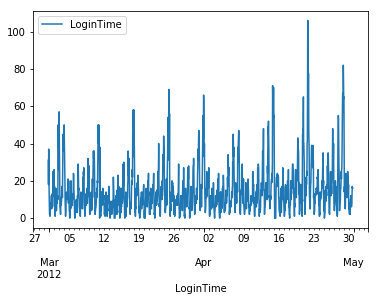

In [8]:
local_frame.LoginTime = pd.to_datetime(local_frame.LoginTime)
OneHour = pd.offsets.Hour(1)
local_frame.resample(OneHour, on='LoginTime').count().plot.line() #注意此处采用的是line #Pandas中的resample，重新采样

In [26]:
local_date[3616]

'2012-03-11 01:57:08'

In [27]:
local_date[3617]

'2012-03-11 03:01:17'

In [25]:
local_date[0]

'2012-02-29 19:05:55'

In [26]:
local_date[-1]

'2012-04-30 19:59:29'

In [10]:
day_diff = datetime.datetime.strptime(local_date[-1], "%Y-%m-%d %H:%M:%S") - datetime.datetime.strptime(local_date[0], "%Y-%m-%d %H:%M:%S")
day_cnt = [day_diff.days for i in range(24)]
day_cnt[2] = day_cnt[2] -1  #2点少一天
day_cnt[19] = day_cnt[19]+1 #19点多一天

In [11]:
trun_hour =[0 for y in range(len(local_date))]
for i in range(len(trun_hour)):
    dt = datetime.datetime.strptime(local_date[i],"%Y-%m-%d %H:%M:%S") #datetime.datetime.strptime()将由字符串格式转化为日期格式的函数为: 
    trun_hour[i] = dt.hour
trun_hour = pd.DataFrame(trun_hour) #需要将list转换成dataframe以进行索引和计数
trun_hour = trun_hour.rename(columns = {0: "Hours"})
hour_frequency = trun_hour['Hours'].value_counts(sort=False).sort_index()
frequency_df = pd.DataFrame(hour_frequency)
frequency_df = frequency_df.rename(columns = {'Hours': "Count"})
frequency_df['Hour_avg'] = frequency_df['Count'] / day_cnt

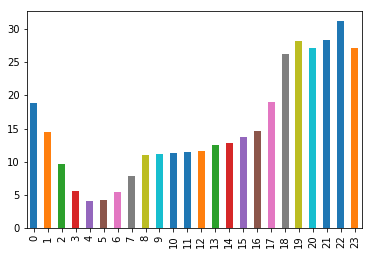

In [12]:
frequency_df['Hour_avg'].plot.bar()

## 4. t 检验

In [35]:
local_4hr =[0 for y in range(len(local_date))]
local_22hr =[0 for y in range(len(local_date))]
for i in range(len(local_date)):
    dt = datetime.datetime.strptime(local_date[i],"%Y-%m-%d %H:%M:%S")
    if dt.hour ==4:
        dt = datetime.datetime(dt.year, dt.month, dt.day, dt.hour) #去掉分和秒的数据以便归类
        local_4hr[i] = datetime.datetime.strftime(dt, "%Y-%m-%d %H:%M:%S")
    if dt.hour == 22:
        dt = datetime.datetime(dt.year, dt.month, dt.day, dt.hour)
        local_22hr[i] = datetime.datetime.strftime(dt, "%Y-%m-%d %H:%M:%S")
local_4hr = [t for t in local_4hr if t != 0 ]        
local_22hr = [t for t in local_22hr if t != 0 ] 

In [36]:
local_4hr = pd.DataFrame(local_4hr)
local_4hr = local_4hr.rename(columns = {0: "Hours"})
freq_4hr = local_4hr['Hours'].value_counts(sort=False)

local_22hr = pd.DataFrame(local_22hr)
local_22hr = local_22hr.rename(columns = {0: "Hours"})
freq_22hr = local_22hr['Hours'].value_counts(sort=False)

In [37]:
from scipy import stats
stats.ttest_ind(freq_22hr,freq_4hr) #T检验

Ttest_indResult(statistic=11.037800140338922, pvalue=1.1602168319804932e-19)

# 四、统计和时间序列模型

## 1. 时间序列ARIMA模型

### 1.4 ACF和PACF图像

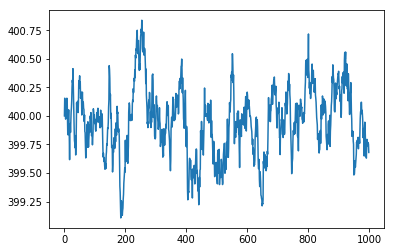

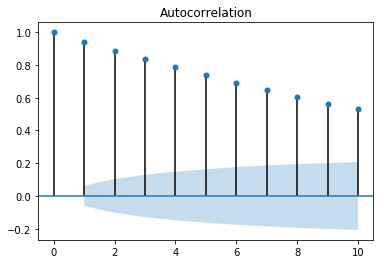

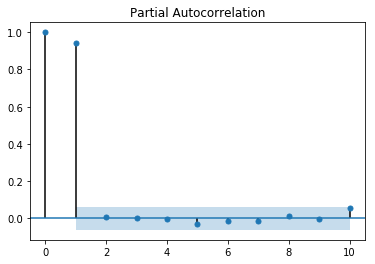

In [29]:
import random # 生成随机数
from pandas import Series 
from matplotlib import pyplot
from statsmodels.graphics.tsaplots import plot_acf #获取acf图像绘制的包
from statsmodels.graphics.tsaplots import plot_pacf#获取pacf图像绘制的包
num = 1000
testAR = [0.00000 for t in range(num)]
for i in range(num):
    if i == 0:
        testAR[i] = 400
    else:
        testAR[i] = testAR[i-1]*0.95 + 20+ random.normalvariate(0,0.1)  #构造参数为0.95的AR(1)过程
series = Series(testAR)
series.plot()
pyplot.show()
plot_acf(series,lags = 10) #作出acf图像
pyplot.show()       
plot_pacf(series, lags = 10)  #作出pacf图像
pyplot.show()

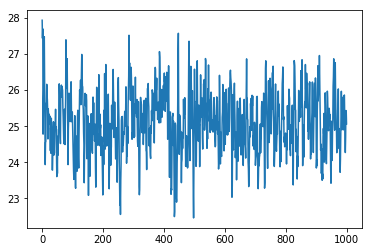

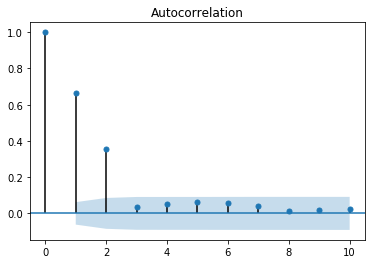

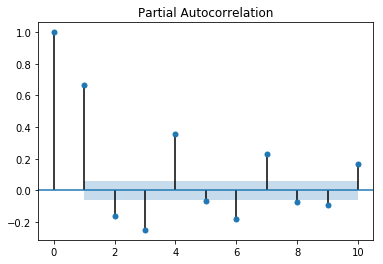

In [59]:
testMA = [0.00000 for t in range(num)]
for i in range(num):
    if i == 0:
        current = random.normalvariate(0,1)
        L1 = 0
        L2 = 0
    elif i == 1:
        L2 = 0
        L1 = current
        current = random.normalvariate(0,0.75)
    else:
        L2 = L1
        L1 = current
        current = random.normalvariate(0,0.5)
    testMA[i] = current + 25+ L1*0.95+L2*0.9   #构造参数为0.95和0.9的MA(2)过程
series = Series(testMA)
series.plot()
pyplot.show()
plot_acf(series,lags = 10)
pyplot.show()       
plot_pacf(series, lags = 10)
pyplot.show()

### 1.5 ARIMA 模型在python下的实现

In [32]:
import pandas
from statsmodels.tsa.arima_model import ARIMA
tAR = pandas.DataFrame({'Value':testAR})
model = ARIMA(tAR,order = (1,0,0))
model_fit = model.fit()

In [47]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                  Value   No. Observations:                 1000
Model:                     ARMA(1, 0)   Log Likelihood                 889.670
Method:                       css-mle   S.D. of innovations              0.099
Date:                Mon, 11 Mar 2019   AIC                          -1773.339
Time:                        19:33:36   BIC                          -1758.616
Sample:                             0   HQIC                         -1767.743
                                                                              
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const         399.9425      0.080   5013.050      0.000     399.786     400.099
ar.L1.Value     0.9616      0.008    113.394      0.000       0.945       0.978
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0399           +0.0000j            1.0399            0.0000
-----------------------------------------------------------------------------
"""

In [66]:
tMA = pandas.DataFrame({'Value':testMA})
model = ARIMA(tMA,order = (0,0,1))
model_fit = model.fit()

In [67]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                  Value   No. Observations:                 1000
Model:                     ARMA(0, 1)   Log Likelihood               -1061.286
Method:                       css-mle   S.D. of innovations              0.699
Date:                Sun, 31 Mar 2019   AIC                           2128.573
Time:                        20:26:26   BIC                           2143.296
Sample:                             0   HQIC                          2134.168
                                                                              
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          25.1038      0.033    759.846      0.000      25.039      25.169
ma.L1.Value     0.4947      0.020     25.107      0.000       0.456       0.533
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1           -2.0216           +0.0000j            2.0216            0.5000
-----------------------------------------------------------------------------
"""

MA过程我们设定的一阶和二阶参数是0.95和0.9，常数是25。而模型拟合得到的结果的参数（coef）为0.9675和0.9106，常数为25.43。模型拟合结果也比较接近。

## 2. 用户登录频率案例的ARIMA模型拟合

### 2.1 ARMA模型参数初步选择

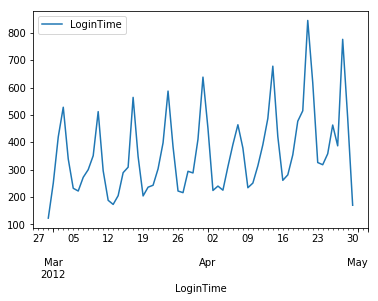

In [14]:
import pandas as pd
local_frame_daily = pd.DataFrame(local_date)
local_frame_daily = local_frame_daily.rename(columns = {0: "LoginTime"}) 
local_frame_daily.LoginTime = pd.to_datetime(local_frame_daily.LoginTime)
OneDay = pd.offsets.Day(1) #按照每日来resample
local_frame_daily.resample(OneDay, on='LoginTime').count().plot.line() 

In [61]:
Daily_count = local_frame_daily.resample(OneDay, on='LoginTime').count()['LoginTime']
Daily_count = pd.Series(Daily_count)
Daily_diff = Daily_count.diff(periods = 7)   #进行差分

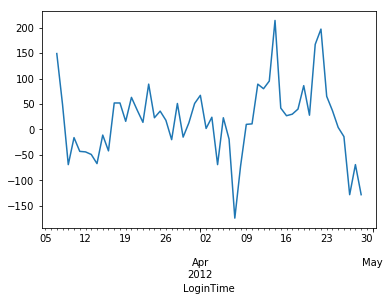

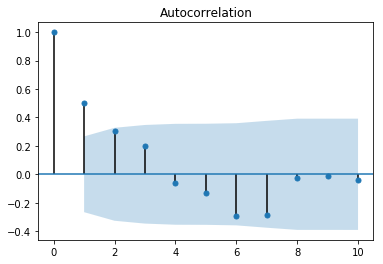

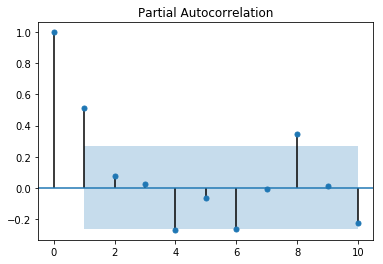

In [63]:
Daily_diff = Daily_diff[7:(len(Daily_diff)-1)]   #构造差分序列
Daily_diff.plot()
pyplot.show()
plot_acf(Daily_diff,lags = 10)
pyplot.show()       
plot_pacf(Daily_diff, lags = 10)
pyplot.show()

### 2.3 基于信息准则的模型选择

In [64]:
Daily_diff = pandas.DataFrame({'Value':Daily_diff})
model = ARIMA(Daily_diff,order = (1,0,1))
model_fit = model.fit()

In [65]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                  Value   No. Observations:                   54
Model:                     ARMA(1, 1)   Log Likelihood                -299.251
Method:                       css-mle   S.D. of innovations             61.498
Date:                Mon, 11 Mar 2019   AIC                            606.502
Time:                        20:34:29   BIC                            614.458
Sample:                    03-07-2012   HQIC                           609.570
                         - 04-29-2012                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          17.8640     20.512      0.871      0.388     -22.339      58.067
ar.L1.Value     0.6524      0.178      3.659      0.001       0.303       1.002
ma.L1.Value    -0.1219      0.215     -0.566      0.574      -0.544       0.300
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.5328           +0.0000j            1.5328            0.0000
MA.1            8.2002           +0.0000j            8.2002            0.0000
-----------------------------------------------------------------------------
"""

In [66]:
model = ARIMA(Daily_diff,order = (1,0,2))
model_fit = model.fit()

In [67]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                  Value   No. Observations:                   54
Model:                     ARMA(1, 2)   Log Likelihood                -299.176
Method:                       css-mle   S.D. of innovations             61.401
Date:                Mon, 11 Mar 2019   AIC                            608.351
Time:                        20:34:48   BIC                            618.296
Sample:                    03-07-2012   HQIC                           612.186
                         - 04-29-2012                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          18.2408     20.659      0.883      0.381     -22.251      58.732
ar.L1.Value     0.6267      0.201      3.117      0.003       0.233       1.021
ma.L1.Value    -0.1254      0.230     -0.545      0.588      -0.577       0.326
ma.L2.Value     0.0755      0.185      0.408      0.685      -0.287       0.438
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.5957           +0.0000j            1.5957            0.0000
MA.1            0.8300           -3.5426j            3.6385           -0.2134
MA.2            0.8300           +3.5426j            3.6385            0.2134
-----------------------------------------------------------------------------
"""

In [89]:
model = ARIMA(Daily_diff,order = (2,0,0))
model_fit = model.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                  Value   No. Observations:                   54
Model:                     ARMA(2, 0)   Log Likelihood                -299.243
Method:                       css-mle   S.D. of innovations             61.488
Date:                Mon, 11 Mar 2019   AIC                            606.485
Time:                        20:53:12   BIC                            614.441
Sample:                    03-07-2012   HQIC                           609.554
                         - 04-29-2012                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          17.9509     20.483      0.876      0.385     -22.194      58.096
ar.L1.Value     0.5256      0.142      3.711      0.001       0.248       0.803
ar.L2.Value     0.0782      0.143      0.546      0.587      -0.202       0.359
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.5467           +0.0000j            1.5467            0.0000
AR.2           -8.2686           +0.0000j            8.2686            0.5000
-----------------------------------------------------------------------------
"""

In [73]:
model = ARIMA(Daily_diff,order = (1,0,0))
model_fit = model.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                  Value   No. Observations:                   54
Model:                     ARMA(1, 0)   Log Likelihood                -299.391
Method:                       css-mle   S.D. of innovations             61.668
Date:                Mon, 11 Mar 2019   AIC                            604.783
Time:                        20:39:12   BIC                            610.750
Sample:                    03-07-2012   HQIC                           607.084
                         - 04-29-2012                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          18.2010     18.920      0.962      0.340     -18.881      55.283
ar.L1.Value     0.5668      0.120      4.704      0.000       0.331       0.803
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.7643           +0.0000j            1.7643            0.0000
-----------------------------------------------------------------------------
"""

In [83]:
model = ARIMA(Daily_diff,order = (8,0,1))
model_fit = model.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                  Value   No. Observations:                   54
Model:                     ARMA(8, 1)   Log Likelihood                -292.388
Method:                       css-mle   S.D. of innovations             53.291
Date:                Mon, 11 Mar 2019   AIC                            606.777
Time:                        20:49:19   BIC                            628.656
Sample:                    03-07-2012   HQIC                           615.215
                         - 04-29-2012                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          21.5817     13.201      1.635      0.109      -4.292      47.456
ar.L1.Value     0.4729      0.341      1.387      0.172      -0.195       1.141
ar.L2.Value     0.1080      0.221      0.489      0.627      -0.325       0.541
ar.L3.Value     0.2282      0.157      1.449      0.154      -0.080       0.537
ar.L4.Value    -0.1929      0.177     -1.088      0.283      -0.540       0.155
ar.L5.Value    -0.0183      0.180     -0.101      0.920      -0.372       0.335
ar.L6.Value    -0.3108      0.149     -2.081      0.043      -0.603      -0.018
ar.L7.Value    -0.1116      0.188     -0.594      0.556      -0.480       0.257
ar.L8.Value     0.2755      0.152      1.815      0.076      -0.022       0.573
ma.L1.Value    -0.0076      0.340     -0.022      0.982      -0.675       0.659
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -0.7895           -0.7983j            1.1228           -0.3741
AR.2           -0.7895           +0.7983j            1.1228            0.3741
AR.3           -1.3879           -0.0000j            1.3879           -0.5000
AR.4            0.0569           -1.1412j            1.1426           -0.2421
AR.5            0.0569           +1.1412j            1.1426            0.2421
AR.6            0.9462           -0.5178j            1.0786           -0.0797
AR.7            0.9462           +0.5178j            1.0786            0.0797
AR.8            1.3659           -0.0000j            1.3659           -0.0000
MA.1          131.8035           +0.0000j          131.8035            0.0000
-----------------------------------------------------------------------------
"""

In [99]:
model = ARIMA(Daily_diff,order = (2,0,2))
model_fit = model.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                  Value   No. Observations:                   54
Model:                     ARMA(2, 2)   Log Likelihood                -294.145
Method:                       css-mle   S.D. of innovations             53.162
Date:                Mon, 11 Mar 2019   AIC                            600.290
Time:                        21:55:01   BIC                            612.224
Sample:                    03-07-2012   HQIC                           604.893
                         - 04-29-2012                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          22.5645     13.106      1.722      0.091      -3.123      48.252
ar.L1.Value     1.5041      0.091     16.618      0.000       1.327       1.681
ar.L2.Value    -0.8681      0.083    -10.521      0.000      -1.030      -0.706
ma.L1.Value    -1.3396      0.771     -1.737      0.089      -2.851       0.172
ma.L2.Value     1.0000      1.148      0.871      0.388      -1.249       3.249
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            0.8663           -0.6336j            1.0733           -0.1005
AR.2            0.8663           +0.6336j            1.0733            0.1005
MA.1            0.6698           -0.7425j            1.0000           -0.1332
MA.2            0.6698           +0.7425j            1.0000            0.1332
-----------------------------------------------------------------------------
"""

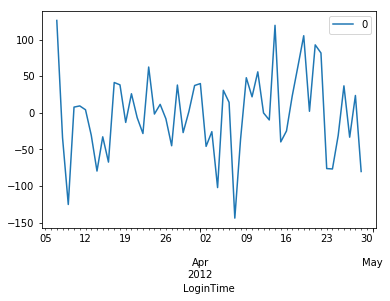

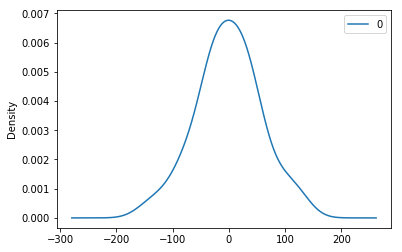

                0
count   54.000000
mean    -1.046549
std     57.347188
min   -143.972311
25%    -33.139558
50%      0.878805
75%     37.331968
max    126.435523


In [94]:
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
residuals.plot(kind='kde')
pyplot.show()
print(residuals.describe())

### 2.4 结果预测

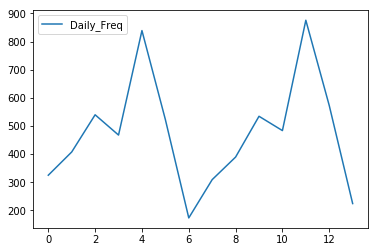

In [100]:
import pandas as pd
output = model_fit.forecast(steps = 14)[0]
result = [0.000 for i in range(14)]
for i in range(14):
    if i <7:
        result[i] = output[i] + Daily_count[-7+i]
    else:
        result[i] = output[i] + result[-7+i]    
result= pd.DataFrame(result)
result = result.rename(columns = {0: "Daily_Freq"}) 
result.plot.line()

## 3. 线性回归模型的局限性

### 3.1 简单的线性回归模型

In [23]:
import statsmodels.formula.api as sm

Daily_count = local_frame_daily.resample(OneDay, on='LoginTime').count()['LoginTime']
Daily_count[0:13]
df = pd.DataFrame({"Count": Daily_count, "Num": [i for i in range(len(Daily_count))], "Seasonal": [(i+3)%7 for i in range(len(Daily_count))]})
result = sm.ols(formula = "Count~Num+Seasonal", data = df).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Count   R-squared:                       0.416
Model:                            OLS   Adj. R-squared:                  0.396
Method:                 Least Squares   F-statistic:                     21.02
Date:                Sun, 07 Apr 2019   Prob (F-statistic):           1.28e-07
Time:                        10:46:46   Log-Likelihood:                -381.47
No. Observations:                  62   AIC:                             768.9
Df Residuals:                      59   BIC:                             775.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    145.0981     37.393      3.880      0.000      70.276     219.920
Num            3.2149      0.828      3.882      0.000       1.558       4.872
Seasonal      39.4199      7.366      5.352      0.000      24.681      54.158
==============================================================================
Omnibus:                        6.820   Durbin-Watson:                   1.221
Prob(Omnibus):                  0.033   Jarque-Bera (JB):                6.937
Skew:                           0.816   Prob(JB):                       0.0312
Kurtosis:                       2.846   Cond. No.                         90.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [101]:
df.iloc[-1,:]

Count       170
Num          61
Seasonal      1
Name: 2012-04-30 00:00:00, dtype: int64

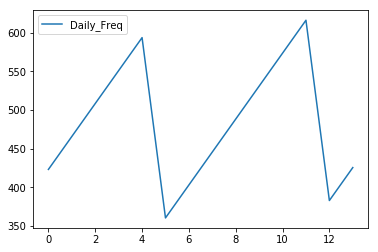

In [102]:
Num_pred = [i+62 for i in range(14)]
Seasonal_pred = [(i+2)%7 for i in range(14)]
Count_pred = [145.0981+3.2149*Num_pred[i]+39.4199*Seasonal_pred[i] for i in range(14) ]
Count_pred= pd.DataFrame(Count_pred)
Count_pred = Count_pred.rename(columns = {0: "Daily_Freq"}) 
Count_pred.plot.line()